In [5]:
# Imports
import numpy as np
import pandas as pd
# import dcMinMaxFunctions as dc
# import dcor
from scipy.misc import derivative
from sklearn.model_selection import train_test_split
import math

import torch
from scipy import stats
import wandb
from cov_help import *



In [6]:
model = nn.Sequential(
            nn.Linear(54, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 7),
            nn.Softmax(dim=1)

        )

In [7]:
#number of parameters in model
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(pytorch_total_params)

78663


In [8]:
data_path = 'data/covtype.csv'
norm =1
X,Y = cov_data_loader(data_path,norm=norm)


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
train_priv = torch.utils.data.TensorDataset(X_train, Y_train)
test_priv = torch.utils.data.TensorDataset(X_test, Y_test)
trainloader_priv = torch.utils.data.DataLoader(train_priv, batch_size=4096,
                                          shuffle=True, num_workers=4, drop_last=True)
testloader_priv = torch.utils.data.DataLoader(test_priv, batch_size=4096,
                                          shuffle=False, num_workers=4, drop_last=True)

In [13]:
model_path = 'Models/cov_full'
state_dict = torch.load(model_path)

    # Create an instance of Net
net = Net(1,device=torch.device('cuda:3'))
net.load_state_dict(state_dict)

<All keys matched successfully>

In [14]:
X_emb_train,losses_train = create_model_embs2(net,trainloader_priv,device= torch.device('cuda:3'),l=len(X_train),h=0.82)


In [15]:
max_dist = 1
# X_emb_train,losses_train = create_model_embs2(net,trainloader_priv,device= torch.device('cuda'),l=len(X_train),h=0.82)
X_emb_test,losses_test = create_model_embs2(net,testloader_priv,device= torch.device('cuda:3'),l=len(X_test),h=0.82)
# losses_train,indices = torch.sort(losses_train*max_dist)

In [20]:
torch.save(X_emb_train, 'Embeddings/cov_full_2/X_emb_train.pt')
torch.save(X_emb_test, 'Embeddings/cov_full_2/X_emb_test.pt')
torch.save(losses_train, 'Embeddings/cov_full_2/losses_train.pt')
torch.save(losses_test, 'Embeddings/cov_full_2/losses_test.pt')

In [9]:
def plot_histogram(losses, eps):
    import matplotlib.pyplot as plt
    plt.hist(losses, bins=30)
    plt.axvline(x=eps, color='r', linestyle='--', linewidth=2, label='Epsilon')
    plt.xlabel('Loss')
    plt.ylabel('Frequency')
    plt.title('Histogram of Losses')
    plt.legend()
    plt.show()

In [10]:
plot_histogram(losses_train,eps)
plot_histogram(losses_test,eps)

NameError: name 'eps' is not defined

(array([1.9610e+03, 0.0000e+00, 0.0000e+00, 1.7000e+01, 1.9500e+02,
        1.0250e+03, 3.3060e+03, 7.6700e+03, 1.4771e+04, 2.3616e+04,
        3.2464e+04, 4.0023e+04, 4.5020e+04, 4.5318e+04, 4.1373e+04,
        3.5147e+04, 2.8164e+04, 2.3232e+04, 1.9001e+04, 1.6046e+04,
        1.3284e+04, 1.1362e+04, 9.4020e+03, 8.0580e+03, 6.6660e+03,
        5.4930e+03, 4.8930e+03, 4.2620e+03, 3.7090e+03, 3.2940e+03,
        2.9250e+03, 2.3220e+03, 2.1120e+03, 1.8540e+03, 1.4010e+03,
        1.1770e+03, 9.6600e+02, 7.5700e+02, 6.0200e+02, 4.5900e+02,
        3.2700e+02, 2.5300e+02, 2.1300e+02, 1.9700e+02, 1.6500e+02,
        1.3600e+02, 9.2000e+01, 5.0000e+01, 2.2000e+01, 7.0000e+00]),
 array([0.        , 0.00768014, 0.01536028, 0.02304042, 0.03072056,
        0.03840069, 0.04608084, 0.05376097, 0.06144111, 0.06912125,
        0.07680139, 0.08448153, 0.09216167, 0.0998418 , 0.10752194,
        0.11520208, 0.12288222, 0.13056237, 0.1382425 , 0.14592265,
        0.15360278, 0.16128291, 0.16896306, 0.

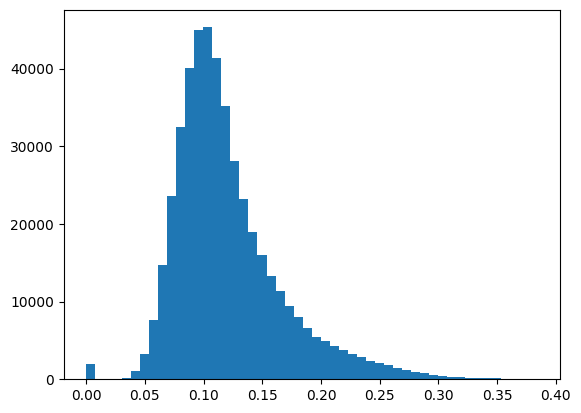

In [17]:
import matplotlib.pyplot as plt
plt.hist(losses_train, bins=50)

(array([1.5150e+03, 0.0000e+00, 0.0000e+00, 4.0000e+00, 4.5000e+01,
        2.3700e+02, 7.5300e+02, 1.8110e+03, 3.5950e+03, 5.7700e+03,
        7.8030e+03, 9.7100e+03, 1.1007e+04, 1.1198e+04, 1.0350e+04,
        8.8780e+03, 7.0490e+03, 5.7680e+03, 4.8410e+03, 4.0270e+03,
        3.2950e+03, 2.8030e+03, 2.4610e+03, 2.0310e+03, 1.7590e+03,
        1.3730e+03, 1.1500e+03, 1.0730e+03, 9.7700e+02, 8.6300e+02,
        7.4800e+02, 6.1400e+02, 5.0800e+02, 4.6400e+02, 3.7100e+02,
        2.9000e+02, 2.1100e+02, 2.0700e+02, 1.5900e+02, 1.2200e+02,
        8.1000e+01, 6.7000e+01, 6.5000e+01, 3.7000e+01, 3.6000e+01,
        3.5000e+01, 2.3000e+01, 1.0000e+01, 6.0000e+00, 3.0000e+00]),
 array([0.        , 0.007649  , 0.015298  , 0.022947  , 0.030596  ,
        0.038245  , 0.045894  , 0.05354301, 0.06119201, 0.06884101,
        0.07649001, 0.08413901, 0.09178801, 0.09943701, 0.10708601,
        0.11473501, 0.12238401, 0.13003302, 0.13768202, 0.14533101,
        0.15298001, 0.16062902, 0.16827802, 0.

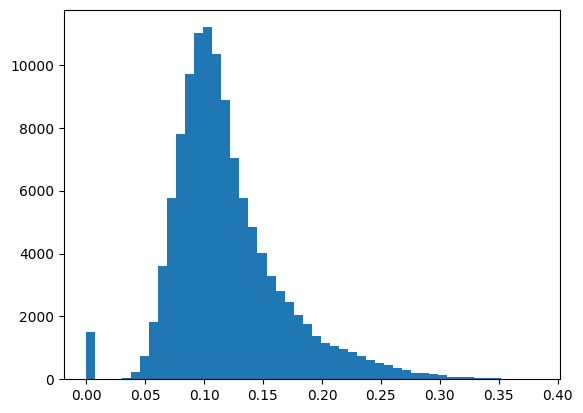

In [21]:
plt.hist(losses_test, bins=50)

In [22]:
torch.cuda.empty_cache()

In [29]:
device = torch.device('cuda:3')
losses_train,indices = torch.sort(losses_train*max_dist)
eps =1 
# print(indices)
wandb_project = 'covertype test'
wandb.init(project=wandb_project)
X_train = X_train[indices]
X_emb_train = X_emb_train[indices]
Y_train = Y_train[indices]

learning_rate = 0.0003
set_eps = eps
ind = (losses_train < set_eps).sum()
print(ind)
# num_epochs_eps = int(len(X)*num_epochs/ind)
batch_size = 4096
batch_size_eps = batch_size
print(batch_size_eps)
#write code for train test split using X_emb and Y

# Remove all things from cuda that were generated till now
torch.cuda.empty_cache()

num_epochs =100


train_emb_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_emb_train[0:ind],Y_train[0:ind]), batch_size=batch_size_eps,
                                        shuffle=True, num_workers=2,drop_last=True)
test_emb_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_emb_test,Y_test), batch_size=batch_size_eps,
                                        shuffle=False, num_workers=2)

#write code to append Xemb and Xemb_rest

criterion = nn.CrossEntropyLoss()
# model = nn.Sequential(
#             nn.Linear(54, 128),
#             nn.ReLU(),
#             nn.Linear(128, 256),
#             nn.ReLU(),
#             nn.Linear(256, 128),
#             nn.ReLU(),
#             nn.Linear(128, 7),
#             nn.Softmax(dim=1)

#         )
model = nn.Sequential(
        nn.Linear(54, 64),
        nn.ReLU(),
        nn.Linear(64, 64),
        nn.ReLU(),
        nn.Linear(64, 128),
        nn.ReLU(),
        nn.Linear(128, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 64),
        nn.ReLU(),
        nn.Linear(64, 7),
        nn.Softmax(dim=1)
    )
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate,weight_decay=1e-4)


train_emb(model, train_emb_loader, criterion, optimizer, num_epochs=num_epochs,device=device,test_loader = test_emb_loader,test_total_loader = None)

print("Time taken to train the model: ",time_end-time_start)
model.to(torch.device('cpu'))

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


tensor(464809)
4096


KeyboardInterrupt: 